In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# Importing the dataset
train_data = pd.read_csv("data/fashion-mnist_train.csv")
test_data = pd.read_csv("data/fashion-mnist_test.csv")

In [3]:
# Inspecting the data
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1st column is for for the label (output) which we have to predict <br>
Rest of the 784 columns contains the pixels of the image ranging from 0-255 which is the range of the grayscale image <br>
Hence the images will have the dimension of sqrt(784) which is equal to 28x28

In [4]:
train_data.shape

(60000, 785)

In [5]:
test_data.shape

(10000, 785)

In [6]:
labels = {0: "T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle Boot"}
def lookupLabel(index):
    return labels[index]

In [7]:
# Checking if our lookup function is working properly or not
lookupLabel(8)

'Bag'

In [8]:
# Converting to a numpy array
train_arr = np.array(train_data)
train_arr

array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
# Converting to a numpy array
test_arr = np.array(test_data)
test_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 1, 0],
       [8, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

'Sandal'

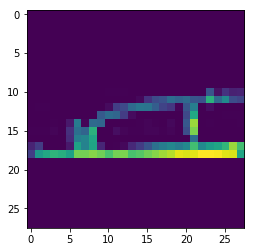

In [10]:
# Inspecting some random samples from data
rand = random.randint(1,60000)
plt.imshow(train_arr[rand,1:].reshape(28,28))
lookupLabel(train_arr[rand,0])

In [11]:
# Scaling the data
X_train = train_arr[:, 1:]/255
X_test = test_arr[:, 1:]/255

In [12]:
# Spliting target variable
y_train = train_arr[:, 0]
y_test = test_arr[:, 0]

In [13]:
# Reshaping into 28x28x1 images for our model
X_train = X_train.reshape([X_train.shape[0], 28, 28, 1])
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_test = X_test.reshape([X_test.shape[0], 28, 28, 1])
X_test.shape

(10000, 28, 28, 1)

In [15]:
# Convolutional Neural Network

In [16]:
# Importing the Keras libraries and packages
import keras

Using TensorFlow backend.


In [17]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [18]:
# Initializing the CNN
classifier = Sequential()

In [19]:
# Step 1: Convolution
classifier.add(Convolution2D(128, (3, 3), input_shape=(28, 28, 1), activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
classifier.add(Convolution2D(128, (3, 3), input_shape=(28, 28, 1), activation='relu'))

In [21]:
# Step 2: Max Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [22]:
classifier.add(Convolution2D(128, (3, 3), activation='relu'))

In [23]:
# Step 3: Flattening
classifier.add(Flatten())

In [24]:
#  Step 4: Full Connection
classifier.add(Dense(units = 16, activation = 'relu'))
# Sigmoid activation for multi-class classification
classifier.add(Dense(units = 10, activation = 'sigmoid'))

In [25]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                204816    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total para

In [26]:
# Fitting the ANN to the training set
nn_history = classifier.fit(X_train, y_train, batch_size = 256, nb_epoch = 10, validation_data = (X_test, y_test))

Instructions for updating:
Use tf.cast instead.


F:\Installed\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.0881 - acc: 0.4123 - val_loss: 0.4717 - val_acc: 0.8367
Epoch 2/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.3746 - acc: 0.8659 - val_loss: 0.3141 - val_acc: 0.8896
Epoch 3/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.2833 - acc: 0.8980 - val_loss: 0.2599 - val_acc: 0.9058
Epoch 4/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.2436 - acc: 0.9127 - val_loss: 0.2577 - val_acc: 0.9088
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.2137 - acc: 0.9228 - val_loss: 0.2363 - val_acc: 0.9157
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.1870 - acc: 0.9323 - val_loss: 0.2152 - val_acc: 0.9251
Epoch 7/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.1671 - acc: 0.9387 - val_loss: 0.2403 - 

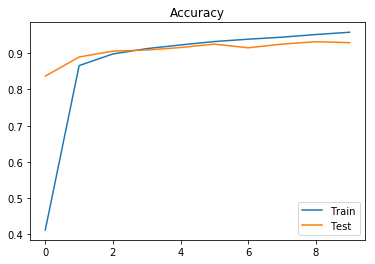

In [27]:
plt.plot(nn_history.history['acc'])
plt.plot(nn_history.history['val_acc'])
plt.title('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

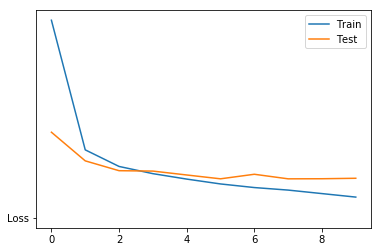

In [28]:
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss'])
plt.plot('Loss')
plt.legend(['Train', 'Test'])
plt.show()

In [29]:
# Predicting the test set result
y_pred = classifier.predict_classes(X_test)

In [30]:
result = classifier.evaluate(x=X_test, y=y_test)
print("Accuracy of the model is: %.2f percent"%(result[1]*100))

10000/10000 [==============================] - 8s 809us/step
Accuracy of the model is: 92.92 percent


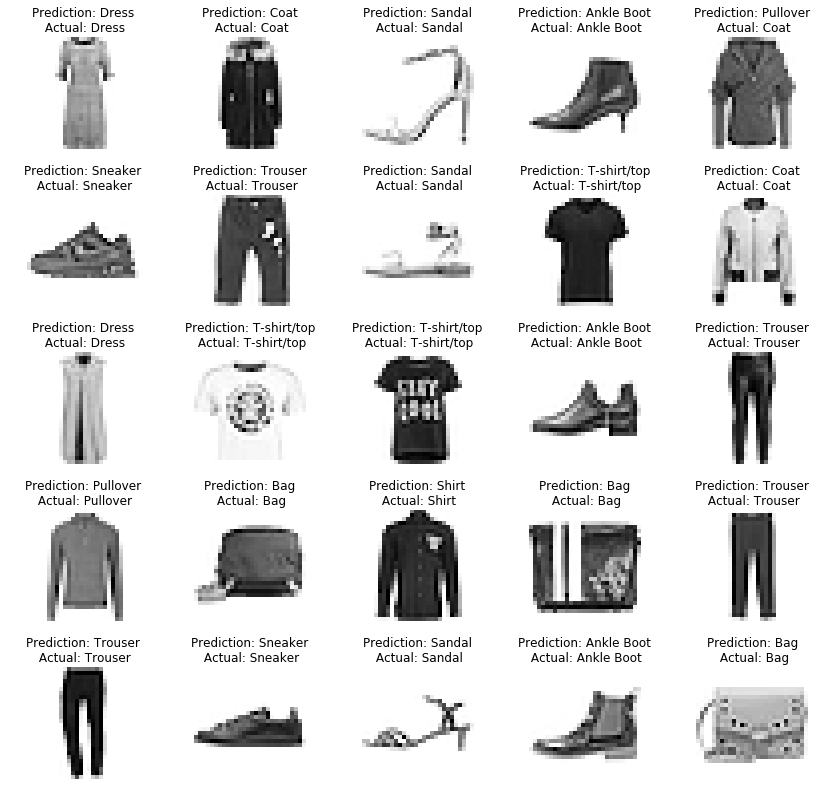

In [31]:
fig, axes = plt.subplots(5, 5, figsize=(14, 14))
# axes is currently in multiple lists, ravel reshapes it to 1D
axes = axes.ravel()
# Testing on random samples from test data
rand = random.randint(0, 10000)
# Checking 25 samples
for i in range(25):
    axes[i].imshow(X_test[rand + i].reshape(28, 28), cmap="Greys")
    axes[i].set_title('Prediction: %s\n Actual: %s' %
                      (lookupLabel(y_pred[rand + i]), lookupLabel(y_test[rand + i])))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)